## 1. Import and Install Dependencies

In [1]:
!pip install tensorflow==2.4.1 tensorflow-gpu==2.4.1 opencv-python mediapipe sklearn matplotlib

In [2]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

## 2.Keypoints using MP Holistic

In [3]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [4]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [5]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections 

In [7]:
mp_holistic.POSE_CONNECTIONS # mp_drawing.draw_landmarks??

frozenset({(0, 1),
           (0, 4),
           (1, 2),
           (2, 3),
           (3, 7),
           (4, 5),
           (5, 6),
           (6, 8),
           (9, 10),
           (11, 12),
           (11, 13),
           (11, 23),
           (12, 14),
           (12, 24),
           (13, 15),
           (14, 16),
           (15, 17),
           (15, 19),
           (15, 21),
           (16, 18),
           (16, 20),
           (16, 22),
           (17, 19),
           (18, 20),
           (23, 24),
           (23, 25),
           (24, 26),
           (25, 27),
           (26, 28),
           (27, 29),
           (27, 31),
           (28, 30),
           (28, 32),
           (29, 31),
           (30, 32)})

In [99]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()
         # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', frame)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):q
        break
cap.release()
cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>


In [7]:
 results.face_landmarks 

landmark {
  x: 0.5461283922195435
  y: 0.4761500954627991
  z: -0.02411836013197899
}
landmark {
  x: 0.5434009432792664
  y: 0.43090173602104187
  z: -0.04569259658455849
}
landmark {
  x: 0.5441351532936096
  y: 0.44435015320777893
  z: -0.023786205798387527
}
landmark {
  x: 0.5339910387992859
  y: 0.3894273340702057
  z: -0.03470461070537567
}
landmark {
  x: 0.5427934527397156
  y: 0.4178314507007599
  z: -0.04871702566742897
}
landmark {
  x: 0.541935384273529
  y: 0.4007359743118286
  z: -0.04551743343472481
}
landmark {
  x: 0.5399845242500305
  y: 0.3602917194366455
  z: -0.02293340116739273
}
landmark {
  x: 0.4793326258659363
  y: 0.3629891574382782
  z: 0.010589106008410454
}
landmark {
  x: 0.5387031435966492
  y: 0.332716166973114
  z: -0.017716458067297935
}
landmark {
  x: 0.5381418466567993
  y: 0.31647905707359314
  z: -0.019685614854097366
}
landmark {
  x: 0.5355788469314575
  y: 0.25537997484207153
  z: -0.01058767270296812
}
landmark {
  x: 0.5464925765991211
  y

In [8]:
len(results.left_hand_landmarks.landmark)

21

In [9]:
results

mediapipe.python.solution_base.SolutionOutputs

In [10]:
frame  

array([[[225, 231, 173],
        [224, 231, 173],
        [224, 232, 174],
        ...,
        [194, 207, 156],
        [195, 206, 160],
        [194, 204, 161]],

       [[225, 233, 176],
        [224, 233, 176],
        [224, 233, 176],
        ...,
        [195, 208, 156],
        [196, 208, 160],
        [196, 207, 161]],

       [[224, 236, 181],
        [223, 235, 180],
        [223, 235, 180],
        ...,
        [196, 210, 156],
        [196, 209, 157],
        [196, 209, 157]],

       ...,

       [[108, 155, 100],
        [112, 156, 106],
        [117, 154, 115],
        ...,
        [ 75,  90,  85],
        [ 77,  93,  86],
        [ 76,  92,  84]],

       [[104, 154, 100],
        [108, 155, 106],
        [113, 155, 114],
        ...,
        [ 77,  95,  88],
        [ 78,  97,  87],
        [ 76,  96,  84]],

       [[101, 153,  99],
        [105, 154, 105],
        [109, 153, 112],
        ...,
        [ 75,  95,  86],
        [ 74,  95,  83],
        [ 72,  93,  81]]

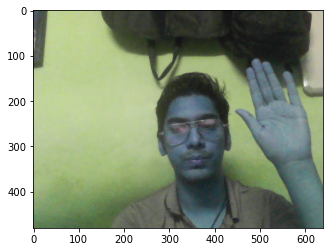

In [70]:
plt.imshow(frame)

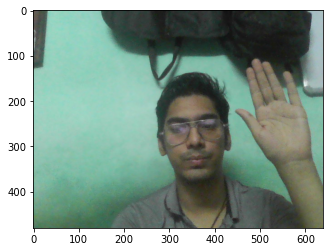

In [71]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [72]:
 results

mediapipe.python.solution_base.SolutionOutputs

In [73]:
draw_landmarks(frame, results)

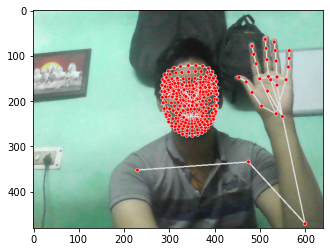

In [15]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [89]:
 
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()
         # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
#          Draw landmarks# after this be able to see our landmarks drawn to the screen in real time 
        draw_landmarks(image, results)
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [90]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             )  

In [94]:
# or 
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             )  

In [95]:
 
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()
         # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
#          Draw landmarks 
        draw_styled_landmarks(image, results)
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

## 3. Extract Keypoint Values

In [19]:
results

mediapipe.python.solution_base.SolutionOutputs

In [42]:
results.pose_landmarks.landmark[0]# grabbing our first value

x: 0.5202661752700806
y: 0.4625917077064514
z: -0.8636455535888672
visibility: 0.999991774559021

In [43]:
results.pose_landmarks.landmark[0].x # grabbing our x

0.5202661752700806

In [44]:
results.pose_landmarks.landmark[0].y # grabbing our y

0.4625917077064514

In [45]:
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
#     test.append(test)

In [46]:
test # that is one set for landmarks

array([4.92844015e-01, 2.82272506e+00, 1.50522053e-01, 3.07426453e-05])

In [47]:
# after result upto test 
# update will on below

In [48]:
len(results.pose_landmarks.landmark)

33

In [49]:
pose =[]
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [50]:
pose 
# there's 33 value

[array([ 0.52026618,  0.46259171, -0.86364555,  0.99999177]),
 array([ 0.5354315 ,  0.40359262, -0.78657401,  0.99998152]),
 array([ 0.54883355,  0.401636  , -0.7863155 ,  0.99998605]),
 array([ 0.56197792,  0.39982259, -0.78600132,  0.99998385]),
 array([ 0.48497114,  0.41289514, -0.80378437,  0.99997461]),
 array([ 0.46653405,  0.41658035, -0.80289447,  0.99997103]),
 array([ 0.45110789,  0.42068112, -0.80294502,  0.99995577]),
 array([ 0.58040255,  0.42733338, -0.37741038,  0.99998832]),
 array([ 0.4291513 ,  0.46160489, -0.43986973,  0.99997646]),
 array([ 0.55149329,  0.52419341, -0.71740669,  0.99998569]),
 array([ 0.49050084,  0.53167492, -0.73577464,  0.99997771]),
 array([ 0.71782792,  0.72475052, -0.2135158 ,  0.99993211]),
 array([ 0.32112753,  0.80245328, -0.19570249,  0.99719596]),
 array([ 0.97851962,  0.88425082, -0.70261979,  0.98619539]),
 array([0.31422022, 1.17123437, 0.01950866, 0.15002903]),
 array([ 0.78625923,  0.48054904, -1.28822744,  0.99664968]),
 array([ 0.2

In [51]:
len(pose)
# gives us the ability to work with each of these landmarks

33

In [52]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]) 
 

In [53]:
pose

array([[ 5.20266175e-01,  4.62591708e-01, -8.63645554e-01,
         9.99991775e-01],
       [ 5.35431504e-01,  4.03592616e-01, -7.86574006e-01,
         9.99981523e-01],
       [ 5.48833549e-01,  4.01636004e-01, -7.86315501e-01,
         9.99986053e-01],
       [ 5.61977923e-01,  3.99822593e-01, -7.86001325e-01,
         9.99983847e-01],
       [ 4.84971136e-01,  4.12895143e-01, -8.03784370e-01,
         9.99974608e-01],
       [ 4.66534048e-01,  4.16580349e-01, -8.02894473e-01,
         9.99971032e-01],
       [ 4.51107889e-01,  4.20681119e-01, -8.02945018e-01,
         9.99955773e-01],
       [ 5.80402553e-01,  4.27333385e-01, -3.77410382e-01,
         9.99988317e-01],
       [ 4.29151297e-01,  4.61604893e-01, -4.39869732e-01,
         9.99976456e-01],
       [ 5.51493287e-01,  5.24193406e-01, -7.17406690e-01,
         9.99985695e-01],
       [ 4.90500838e-01,  5.31674922e-01, -7.35774636e-01,
         9.99977708e-01],
       [ 7.17827916e-01,  7.24750519e-01, -2.13515803e-01,
      

In [54]:
np.shape(pose)

(33, 4)

In [55]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten()
 

In [56]:
np.shape(pose)

(132,)

In [57]:
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten()

In [58]:
lh

array([ 7.86367297e-01,  4.70861346e-01,  1.71406271e-07,  7.36232162e-01,
        4.74426150e-01, -9.22183320e-03,  6.89696550e-01,  4.48886275e-01,
       -1.15739172e-02,  6.60325170e-01,  4.12168860e-01, -1.44615816e-02,
        6.38502479e-01,  3.81493688e-01, -1.64062008e-02,  6.74062908e-01,
        3.80533099e-01,  4.90704551e-03,  6.38558984e-01,  3.36624712e-01,
       -3.59576801e-03,  6.18202150e-01,  3.10919285e-01, -1.26628866e-02,
        6.00470483e-01,  2.88056076e-01, -1.95410065e-02,  6.90437675e-01,
        3.55446130e-01,  1.13174424e-03,  6.52282357e-01,  3.07074249e-01,
       -5.09531097e-03,  6.28671587e-01,  2.78694063e-01, -1.34966979e-02,
        6.07974589e-01,  2.55116910e-01, -1.97702050e-02,  7.12434769e-01,
        3.39792103e-01, -5.34517225e-03,  6.76268160e-01,  2.95252532e-01,
       -1.19978748e-02,  6.53111398e-01,  2.68904984e-01, -1.69454068e-02,
        6.32344723e-01,  2.47958243e-01, -2.07902901e-02,  7.40575969e-01,
        3.30108881e-01, -

In [59]:
lh.shape

(63,)

In [60]:
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten()
# This error occurred because we didn't show your right hand in the video capture

AttributeError: 'NoneType' object has no attribute 'landmark'

In [61]:
np.zeros(21*3) # 21 landmarks by 3 coordinate valules each
 
# create a blank array that look a little bit like that

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [62]:
np.zeros(21*3).shape # simliar like left hand

(63,)

In [63]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
# just add an if statement to the end of flatten to return a blank array if we don't actually have any value


In [64]:
rh.shape

(63,)

In [65]:
rh

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [20]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [21]:
extract_keypoints(results).shape

(1662,)

In [22]:
result_test = extract_keypoints(results)

In [69]:
result_test

array([ 0.52026618,  0.46259171, -0.86364555, ...,  0.        ,
        0.        ,  0.        ])

In [70]:
468*3+33*4+21*3+21*3 
#landmarks*3 coordinate

1662

In [71]:
np.save('0', result_test)

In [72]:
np.load('0.npy')

array([ 0.52026618,  0.46259171, -0.86364555, ...,  0.        ,
        0.        ,  0.        ])

## 4. Setup Folders for Collection

In [25]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['hello', 'thanks', 'iloveyou'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

In [74]:
# hello
## 0
## 1
## 2
## ...
## 29
# thanks

# I love you

In [61]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

## 5. Collect Keypoint Values for Training and Testing¶

In [77]:
cap = cv2.VideoCapture(0 )
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
 
    # NEW LOOP 
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):
# 30 frames if keypoints per video


                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
#                 print(results)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

## 6. Preprocess Data and Create Labels and Features

In [23]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [26]:
label_map = {label:num for num, label in enumerate(actions)}

In [27]:
label_map

{'hello': 0, 'thanks': 1, 'iloveyou': 2}

In [28]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [29]:
np.array(sequences).shape

(90, 30, 1662)

In [30]:
np.array(labels).shape

(90,)

In [31]:
X = np.array(sequences)

In [32]:
X.shape

(90, 30, 1662)

In [33]:
y = to_categorical(labels).astype(int)

In [34]:
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [36]:
y_test.shape

(5, 3)

## 7. Build and Train LSTM Neural Network¶

In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [91]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [38]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [62]:
actions.shape[0]

3

In [63]:
res = [.7, 0.2, 0.1]

In [64]:
actions[np.argmax(res)]

'hello'

In [96]:
res[np.argmax(res)]

0.7

In [97]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [98]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
3/3 [==============================] - 3s 355ms/step - loss: 2.0030 - categorical_accuracy: 0.2583
Epoch 2/2000
3/3 [==============================] - 0s 67ms/step - loss: 14.6165 - categorical_accuracy: 0.3150
Epoch 3/2000
3/3 [==============================] - 0s 89ms/step - loss: 49.6580 - categorical_accuracy: 0.3170
Epoch 4/2000
3/3 [==============================] - 0s 80ms/step - loss: 33.2100 - categorical_accuracy: 0.2994
Epoch 5/2000
3/3 [==============================] - 0s 88ms/step - loss: 57.2703 - categorical_accuracy: 0.3738
Epoch 6/2000
3/3 [==============================] - 0s 86ms/step - loss: 58.5502 - categorical_accuracy: 0.3111
Epoch 7/2000
3/3 [==============================] - 0s 84ms/step - loss: 91.1470 - categorical_accuracy: 0.2035
Epoch 8/2000
3/3 [==============================] - 0s 68ms/step - loss: 53.4326 - categorical_accuracy: 0.4090
Epoch 9/2000
3/3 [==============================] - 0s 94ms/step - loss: 72.2400 - categorical_accuracy:

3/3 [==============================] - 0s 98ms/step - loss: 3.5552 - categorical_accuracy: 0.5850
Epoch 146/2000
3/3 [==============================] - 0s 101ms/step - loss: 4.6182 - categorical_accuracy: 0.3405
Epoch 147/2000
3/3 [==============================] - 0s 75ms/step - loss: 4.8706 - categorical_accuracy: 0.4129
Epoch 148/2000
3/3 [==============================] - 0s 97ms/step - loss: 8.4806 - categorical_accuracy: 0.2720
Epoch 149/2000
3/3 [==============================] - 0s 80ms/step - loss: 2.5839 - categorical_accuracy: 0.5284
Epoch 150/2000
3/3 [==============================] - 0s 73ms/step - loss: 4.6227 - categorical_accuracy: 0.4012
Epoch 151/2000
3/3 [==============================] - 0s 73ms/step - loss: 4.7756 - categorical_accuracy: 0.2466
Epoch 152/2000
3/3 [==============================] - 0s 76ms/step - loss: 6.2037 - categorical_accuracy: 0.3541
Epoch 153/2000
3/3 [==============================] - 0s 76ms/step - loss: 13.0101 - categorical_accuracy: 0.2

3/3 [==============================] - 0s 94ms/step - loss: 1.2458 - categorical_accuracy: 0.5871
Epoch 290/2000
3/3 [==============================] - 0s 101ms/step - loss: 0.7455 - categorical_accuracy: 0.6634
Epoch 291/2000
3/3 [==============================] - 0s 90ms/step - loss: 0.5896 - categorical_accuracy: 0.8258
Epoch 292/2000
3/3 [==============================] - 0s 97ms/step - loss: 1.5302 - categorical_accuracy: 0.5185
Epoch 293/2000
3/3 [==============================] - 0s 100ms/step - loss: 0.8740 - categorical_accuracy: 0.7084
Epoch 294/2000
3/3 [==============================] - 0s 97ms/step - loss: 2.0614 - categorical_accuracy: 0.4755
Epoch 295/2000
3/3 [==============================] - 0s 93ms/step - loss: 1.8723 - categorical_accuracy: 0.4324
Epoch 296/2000
3/3 [==============================] - 0s 94ms/step - loss: 3.1007 - categorical_accuracy: 0.3778
Epoch 297/2000
3/3 [==============================] - 0s 102ms/step - loss: 1.4512 - categorical_accuracy: 0.

3/3 [==============================] - 0s 77ms/step - loss: 0.7729 - categorical_accuracy: 0.7026
Epoch 434/2000
3/3 [==============================] - 0s 162ms/step - loss: 1.4862 - categorical_accuracy: 0.7027
Epoch 435/2000
3/3 [==============================] - 0s 113ms/step - loss: 1.6467 - categorical_accuracy: 0.7182
Epoch 436/2000
3/3 [==============================] - 0s 75ms/step - loss: 1.0428 - categorical_accuracy: 0.7710
Epoch 437/2000
3/3 [==============================] - 0s 89ms/step - loss: 1.2969 - categorical_accuracy: 0.6733
Epoch 438/2000
3/3 [==============================] - 0s 80ms/step - loss: 0.6320 - categorical_accuracy: 0.7944
Epoch 439/2000
3/3 [==============================] - 0s 79ms/step - loss: 1.6309 - categorical_accuracy: 0.6771
Epoch 440/2000
3/3 [==============================] - 0s 77ms/step - loss: 0.8192 - categorical_accuracy: 0.8142
Epoch 441/2000
3/3 [==============================] - 0s 89ms/step - loss: 1.2286 - categorical_accuracy: 0.8

3/3 [==============================] - 0s 93ms/step - loss: 2.2985 - categorical_accuracy: 0.6203
Epoch 578/2000
3/3 [==============================] - 0s 83ms/step - loss: 1.1227 - categorical_accuracy: 0.8297
Epoch 579/2000
3/3 [==============================] - 0s 103ms/step - loss: 0.8108 - categorical_accuracy: 0.7319
Epoch 580/2000
3/3 [==============================] - 0s 95ms/step - loss: 2.0197 - categorical_accuracy: 0.5891
Epoch 581/2000
3/3 [==============================] - 0s 92ms/step - loss: 2.5635 - categorical_accuracy: 0.6183
Epoch 582/2000
3/3 [==============================] - 0s 96ms/step - loss: 1.1695 - categorical_accuracy: 0.6868
Epoch 583/2000
3/3 [==============================] - 0s 101ms/step - loss: 2.0200 - categorical_accuracy: 0.5696
Epoch 584/2000
3/3 [==============================] - 0s 98ms/step - loss: 2.4029 - categorical_accuracy: 0.5441
Epoch 585/2000
3/3 [==============================] - 0s 96ms/step - loss: 1.4812 - categorical_accuracy: 0.6

3/3 [==============================] - 0s 107ms/step - loss: 2.7703 - categorical_accuracy: 0.6557
Epoch 722/2000
3/3 [==============================] - 0s 94ms/step - loss: 1.6400 - categorical_accuracy: 0.7808
Epoch 723/2000
3/3 [==============================] - 0s 109ms/step - loss: 2.3679 - categorical_accuracy: 0.6242
Epoch 724/2000
3/3 [==============================] - 0s 111ms/step - loss: 2.8102 - categorical_accuracy: 0.6106
Epoch 725/2000
3/3 [==============================] - 0s 87ms/step - loss: 3.6574 - categorical_accuracy: 0.6360
Epoch 726/2000
3/3 [==============================] - 0s 109ms/step - loss: 4.7207 - categorical_accuracy: 0.4423
Epoch 727/2000
3/3 [==============================] - 0s 108ms/step - loss: 22.1260 - categorical_accuracy: 0.5049
Epoch 728/2000
3/3 [==============================] - 0s 88ms/step - loss: 51.6656 - categorical_accuracy: 0.2701
Epoch 729/2000
3/3 [==============================] - 0s 106ms/step - loss: 37.8851 - categorical_accura

3/3 [==============================] - 0s 73ms/step - loss: 0.9257 - categorical_accuracy: 0.6927
Epoch 866/2000
3/3 [==============================] - 0s 72ms/step - loss: 1.7720 - categorical_accuracy: 0.6379
Epoch 867/2000
3/3 [==============================] - 0s 106ms/step - loss: 1.0707 - categorical_accuracy: 0.7202
Epoch 868/2000
3/3 [==============================] - 0s 103ms/step - loss: 1.2643 - categorical_accuracy: 0.8063
Epoch 869/2000
3/3 [==============================] - 0s 104ms/step - loss: 1.3060 - categorical_accuracy: 0.6360
Epoch 870/2000
3/3 [==============================] - 0s 107ms/step - loss: 1.1160 - categorical_accuracy: 0.7515
Epoch 871/2000
3/3 [==============================] - 0s 107ms/step - loss: 0.5577 - categorical_accuracy: 0.8278
Epoch 872/2000
3/3 [==============================] - 0s 105ms/step - loss: 0.8613 - categorical_accuracy: 0.8180
Epoch 873/2000
3/3 [==============================] - 0s 106ms/step - loss: 0.9442 - categorical_accuracy

3/3 [==============================] - 0s 93ms/step - loss: 0.6340 - categorical_accuracy: 0.6830
Epoch 1010/2000
3/3 [==============================] - 0s 88ms/step - loss: 1.0814 - categorical_accuracy: 0.8023
Epoch 1011/2000
3/3 [==============================] - 0s 96ms/step - loss: 1.1610 - categorical_accuracy: 0.6087
Epoch 1012/2000
3/3 [==============================] - 0s 85ms/step - loss: 1.2152 - categorical_accuracy: 0.7554
Epoch 1013/2000
3/3 [==============================] - 0s 100ms/step - loss: 0.7539 - categorical_accuracy: 0.7162
Epoch 1014/2000
3/3 [==============================] - 0s 97ms/step - loss: 1.0787 - categorical_accuracy: 0.7633
Epoch 1015/2000
3/3 [==============================] - 0s 101ms/step - loss: 0.9004 - categorical_accuracy: 0.7808
Epoch 1016/2000
3/3 [==============================] - 0s 80ms/step - loss: 0.7530 - categorical_accuracy: 0.7182
Epoch 1017/2000
3/3 [==============================] - 0s 78ms/step - loss: 0.7314 - categorical_accur

3/3 [==============================] - 0s 104ms/step - loss: 0.6501 - categorical_accuracy: 0.7573
Epoch 1152/2000
3/3 [==============================] - 0s 91ms/step - loss: 0.8700 - categorical_accuracy: 0.8454
Epoch 1153/2000
3/3 [==============================] - 0s 94ms/step - loss: 0.7425 - categorical_accuracy: 0.8063
Epoch 1154/2000
3/3 [==============================] - 0s 108ms/step - loss: 0.8099 - categorical_accuracy: 0.8102
Epoch 1155/2000
3/3 [==============================] - 0s 105ms/step - loss: 0.8300 - categorical_accuracy: 0.7652
Epoch 1156/2000
3/3 [==============================] - 0s 107ms/step - loss: 0.5630 - categorical_accuracy: 0.8512
Epoch 1157/2000
3/3 [==============================] - 0s 104ms/step - loss: 0.9231 - categorical_accuracy: 0.6596
Epoch 1158/2000
3/3 [==============================] - 0s 97ms/step - loss: 0.6637 - categorical_accuracy: 0.7632
Epoch 1159/2000
3/3 [==============================] - 0s 102ms/step - loss: 0.6697 - categorical_a

Epoch 1294/2000
3/3 [==============================] - 0s 94ms/step - loss: 0.7043 - categorical_accuracy: 0.7455
Epoch 1295/2000
3/3 [==============================] - 0s 137ms/step - loss: 0.7305 - categorical_accuracy: 0.6909
Epoch 1296/2000
3/3 [==============================] - 0s 95ms/step - loss: 0.7629 - categorical_accuracy: 0.7103
Epoch 1297/2000
3/3 [==============================] - 0s 94ms/step - loss: 0.5474 - categorical_accuracy: 0.8180
Epoch 1298/2000
3/3 [==============================] - 0s 76ms/step - loss: 0.6046 - categorical_accuracy: 0.7201
Epoch 1299/2000
3/3 [==============================] - 0s 96ms/step - loss: 0.8506 - categorical_accuracy: 0.7945
Epoch 1300/2000
3/3 [==============================] - 0s 87ms/step - loss: 0.7398 - categorical_accuracy: 0.6751
Epoch 1301/2000
3/3 [==============================] - 0s 96ms/step - loss: 0.6165 - categorical_accuracy: 0.8552
Epoch 1302/2000
3/3 [==============================] - 0s 103ms/step - loss: 0.8605 - c

3/3 [==============================] - 0s 97ms/step - loss: 0.6086 - categorical_accuracy: 0.7515
Epoch 1437/2000
3/3 [==============================] - 0s 94ms/step - loss: 0.9420 - categorical_accuracy: 0.8121
Epoch 1438/2000
3/3 [==============================] - 0s 105ms/step - loss: 0.5616 - categorical_accuracy: 0.7593
Epoch 1439/2000
3/3 [==============================] - 0s 91ms/step - loss: 0.5616 - categorical_accuracy: 0.8121
Epoch 1440/2000
3/3 [==============================] - 0s 105ms/step - loss: 0.4718 - categorical_accuracy: 0.8708
Epoch 1441/2000
3/3 [==============================] - 0s 104ms/step - loss: 0.4004 - categorical_accuracy: 0.8669
Epoch 1442/2000
3/3 [==============================] - 0s 104ms/step - loss: 0.5882 - categorical_accuracy: 0.8102
Epoch 1443/2000
3/3 [==============================] - 0s 101ms/step - loss: 0.5592 - categorical_accuracy: 0.7261
Epoch 1444/2000
3/3 [==============================] - 0s 99ms/step - loss: 0.8898 - categorical_ac

Epoch 1579/2000
3/3 [==============================] - 0s 95ms/step - loss: 0.5686 - categorical_accuracy: 0.8336
Epoch 1580/2000
3/3 [==============================] - 0s 105ms/step - loss: 0.4849 - categorical_accuracy: 0.8474
Epoch 1581/2000
3/3 [==============================] - 0s 96ms/step - loss: 0.4867 - categorical_accuracy: 0.8258
Epoch 1582/2000
3/3 [==============================] - 0s 84ms/step - loss: 0.4558 - categorical_accuracy: 0.8434
Epoch 1583/2000
3/3 [==============================] - 0s 87ms/step - loss: 0.4419 - categorical_accuracy: 0.8238
Epoch 1584/2000
3/3 [==============================] - 0s 85ms/step - loss: 0.5234 - categorical_accuracy: 0.8454
Epoch 1585/2000
3/3 [==============================] - 0s 95ms/step - loss: 0.5481 - categorical_accuracy: 0.8454
Epoch 1586/2000
3/3 [==============================] - 0s 103ms/step - loss: 0.5204 - categorical_accuracy: 0.8513
Epoch 1587/2000
3/3 [==============================] - 0s 95ms/step - loss: 0.5552 - c

3/3 [==============================] - 0s 88ms/step - loss: 0.7508 - categorical_accuracy: 0.6576
Epoch 1722/2000
3/3 [==============================] - 0s 88ms/step - loss: 0.7461 - categorical_accuracy: 0.8884
Epoch 1723/2000
3/3 [==============================] - 0s 97ms/step - loss: 0.8379 - categorical_accuracy: 0.7123
Epoch 1724/2000
3/3 [==============================] - 0s 96ms/step - loss: 0.7469 - categorical_accuracy: 0.8004
Epoch 1725/2000
3/3 [==============================] - 0s 99ms/step - loss: 0.5854 - categorical_accuracy: 0.8239
Epoch 1726/2000
3/3 [==============================] - 0s 87ms/step - loss: 0.4915 - categorical_accuracy: 0.8473
Epoch 1727/2000
3/3 [==============================] - 0s 79ms/step - loss: 0.4805 - categorical_accuracy: 0.8395
Epoch 1728/2000
3/3 [==============================] - 0s 82ms/step - loss: 0.5265 - categorical_accuracy: 0.8317
Epoch 1729/2000
3/3 [==============================] - 0s 95ms/step - loss: 0.5141 - categorical_accurac

3/3 [==============================] - 0s 96ms/step - loss: 0.7298 - categorical_accuracy: 0.8278
Epoch 1864/2000
3/3 [==============================] - 0s 85ms/step - loss: 0.7808 - categorical_accuracy: 0.7769
Epoch 1865/2000
3/3 [==============================] - 0s 101ms/step - loss: 0.9153 - categorical_accuracy: 0.7378
Epoch 1866/2000
3/3 [==============================] - 0s 100ms/step - loss: 0.7030 - categorical_accuracy: 0.6536
Epoch 1867/2000
3/3 [==============================] - 0s 75ms/step - loss: 1.0356 - categorical_accuracy: 0.5833
Epoch 1868/2000
3/3 [==============================] - 0s 80ms/step - loss: 0.7632 - categorical_accuracy: 0.8611
Epoch 1869/2000
3/3 [==============================] - 0s 85ms/step - loss: 0.5743 - categorical_accuracy: 0.8904
Epoch 1870/2000
3/3 [==============================] - 0s 83ms/step - loss: 0.5487 - categorical_accuracy: 0.8610
Epoch 1871/2000
3/3 [==============================] - 0s 92ms/step - loss: 0.7475 - categorical_accur

In [99]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 30, 64)            442112    
_________________________________________________________________
lstm_1 (LSTM)                (None, 30, 128)           98816     
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 99        
Total params: 596,675
Trainable params: 596,675
Non-trainable params: 0
__________________________________________________

## 8. Make Predictions

In [79]:
model.predict(X_test)

array([[9.7809875e-01, 1.0588111e-02, 1.1313199e-02],
       [7.8255022e-03, 8.7113312e-07, 9.9217367e-01],
       [9.8663447e-03, 2.9520875e-06, 9.9013066e-01],
       [9.7674680e-01, 2.0077946e-02, 3.1752174e-03],
       [9.7310853e-01, 2.5315413e-02, 1.5760238e-03]], dtype=float32)

In [40]:
res = model.predict(X_test)

In [41]:
 np.sum(res[0])

1.0

In [42]:

actions[np.argmax(res[4])]

'thanks'

In [43]:
actions[np.argmax(res[0])]

'thanks'

In [44]:
actions[y_test[0]]

array(['thanks', 'hello', 'hello'], dtype='<U8')

In [45]:
actions[np.argmax(y_test[4])]

'hello'

## 9. Save Weights

In [107]:
model.save('action.h5')

In [108]:
# del model

In [47]:
model.load_weights('action.h5')

## 10. Evaluation using Confusion Matrix and Accuracy

In [48]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [49]:
yhat = model.predict(X_test)

In [50]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [51]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[2, 0],
        [0, 3]],

       [[3, 0],
        [0, 2]]], dtype=int64)

In [54]:
accuracy_score(ytrue, yhat)

1.0

## 11. Test in Real Time

In [52]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

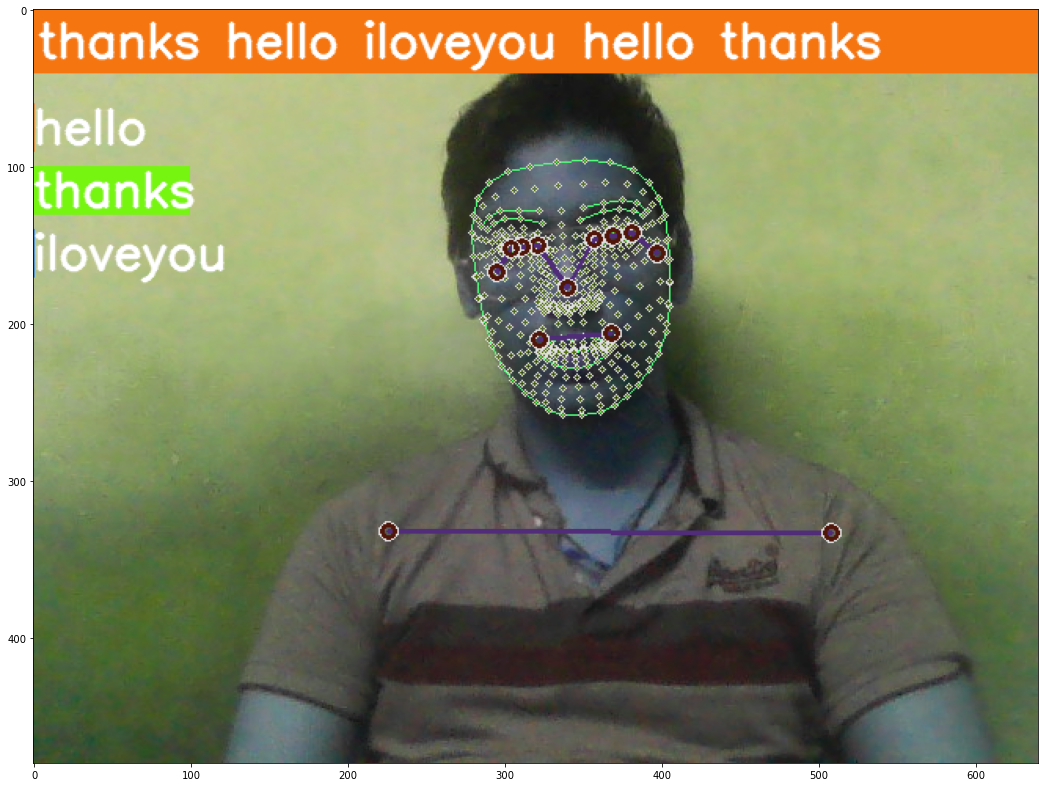

In [57]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

In [59]:
sequence.reverse()

In [60]:
len(sequence)

30

In [56]:
sequence.append('def')

In [57]:
sequence.reverse()

In [58]:
sequence[-30:]

[array([ 0.58906406,  0.58263224, -1.44604027, ...,  0.1846903 ,
         0.27566075, -0.04229857]),
 array([ 0.58906996,  0.58262914, -1.44323957, ...,  0.18670115,
         0.27445677, -0.04232901]),
 array([ 0.5891186 ,  0.5834347 , -1.43019009, ...,  0.18973835,
         0.27466786, -0.04431874]),
 array([ 0.58912301,  0.58283532, -1.40002024, ...,  0.19761997,
         0.27219617, -0.04351017]),
 array([ 0.58920908,  0.58281022, -1.1972146 , ...,  0.19998929,
         0.27150375, -0.04658598]),
 array([ 0.58929306,  0.58240497, -1.19573331, ...,  0.20227513,
         0.27189559, -0.04744306]),
 array([ 0.58956873,  0.58215827, -1.16357803, ...,  0.21301505,
         0.27866215, -0.04393754]),
 array([ 0.58991593,  0.58261502, -1.16062009, ...,  0.21991751,
         0.29045561, -0.04795527]),
 array([ 0.59012026,  0.58260018, -1.15373528, ...,  0.24624482,
         0.41277665, -0.02036395]),
 array([ 0.59053248,  0.58246213, -1.16362965, ...,  0.2453865 ,
         0.48013854,  0.00

In [96]:
# 1. New detection variables
sequence = []
sentence = []
threshold = 0.8

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
#         sequence.insert(0,keypoints)
#         sequence = sequence[:30]
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            
            
        #3. Viz logic
            if res[np.argmax(res)] > threshold: 
                if len(sentence) > 0: 
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
#             image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.sol

<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.S

hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello


In [91]:
X_test[0]

array([[ 0.58171457,  0.61836708, -0.63465291, ...,  0.55662173,
         0.7311368 , -0.02553256],
       [ 0.58741438,  0.66028917, -1.07063639, ...,  0.54725266,
         0.97927111, -0.10486246],
       [ 0.5929963 ,  0.6796065 , -1.18199313, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.65796357,  0.5980714 , -0.66263443, ...,  0.44349262,
         0.50740689, -0.02512559],
       [ 0.65849245,  0.59831154, -0.68629915, ...,  0.44310698,
         0.50692278, -0.02491535],
       [ 0.65873259,  0.5988239 , -0.66562623, ...,  0.44361007,
         0.50806284, -0.02423235]])

In [ ]:
#   model.predict(X_test[0]) 

In [92]:
X_test[0].shape

(30, 1662)

In [93]:
np.expand_dims(X_test[0],axis=0)

array([[[ 0.58171457,  0.61836708, -0.63465291, ...,  0.55662173,
          0.7311368 , -0.02553256],
        [ 0.58741438,  0.66028917, -1.07063639, ...,  0.54725266,
          0.97927111, -0.10486246],
        [ 0.5929963 ,  0.6796065 , -1.18199313, ...,  0.        ,
          0.        ,  0.        ],
        ...,
        [ 0.65796357,  0.5980714 , -0.66263443, ...,  0.44349262,
          0.50740689, -0.02512559],
        [ 0.65849245,  0.59831154, -0.68629915, ...,  0.44310698,
          0.50692278, -0.02491535],
        [ 0.65873259,  0.5988239 , -0.66562623, ...,  0.44361007,
          0.50806284, -0.02423235]]])

In [141]:
# res[np.argmax(res)]>threshold

In [95]:
np.argmax(res)

7

In [94]:
model.predict((np.expand_dims(X_test[0],axis=0)))

array([[0.31472903, 0.32952875, 0.35574222]], dtype=float32)

In [57]:
cap.release()
cv2.destroyAllWindows()